### Importing libraries

In [1]:
# from __future__ import absolute_import
# from __future__ import division
# from __future__ import print_function
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = FutureWarning)

import glob
# import cv2
import lavavu
import pandas as pd
from scipy.interpolate import interp1d
from scipy.interpolate import griddata
import numpy as np
import cmocean as cmo
import matplotlib as mpl
from matplotlib import mlab, cm
import matplotlib.mlab as ml
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.ticker as mticker

# Import the python file (.py) which contains all defined functions
from vis_scripts import stratalArchitecture as strata
from vis_scripts import SedEro as sedero
from vis_scripts import viewBadlands as visu

# Display plots in SVG format
%config InlineBackend.figure_format = 'svg'

# Display plots in cells
%matplotlib inline


ModuleNotFoundError: No module named 'lavavu'

# Part I -  Visualise with Lavavu for a quick overview

In [2]:
folder = 'Output/case3_aus/output_'

# Load the last time step
stepCounter = len(glob.glob1(folder+"/xmf/","tin.time*"))-1
# print('Step Counter: ',stepCounter)

# Load a random time step
# stepCounter = 50

# Get the elevation, cumulative elevation change, flow discharge, and sea level 
tin,flow,sea = visu.loadStep(folder,stepCounter)

# Viewtime is only working with a python3 kernel for now
# visu.viewTime(folder, steps=stepCounter, it=2, scaleZ=2, maxZ=1500, maxED=200, flowlines=True)

visu.view1Step(tin, flow, sea, scaleZ=100, maxZ=1500, maxED=200, flowlines=False)

NameError: name 'visu' is not defined

# PART II - Stratigraphic Output and Sediments 

In [3]:
folder = 'Output/case3_aus/output_/h5/'  # output folder path
strat = strata.stratalSection(folder, 1)
timestep = 140
strat.loadStratigraphy(timestep)  # load strata files
strat.loadTIN(timestep)  # load TIN files

NameError: name 'strata' is not defined

### Well Coordinates

In [4]:
wells = pd.read_csv('data/WellCoordinates_250km_grid.csv')
wells.set_index("ID", drop=True, inplace=True)
wd = wells.to_dict(orient="index")

NameError: name 'pd' is not defined

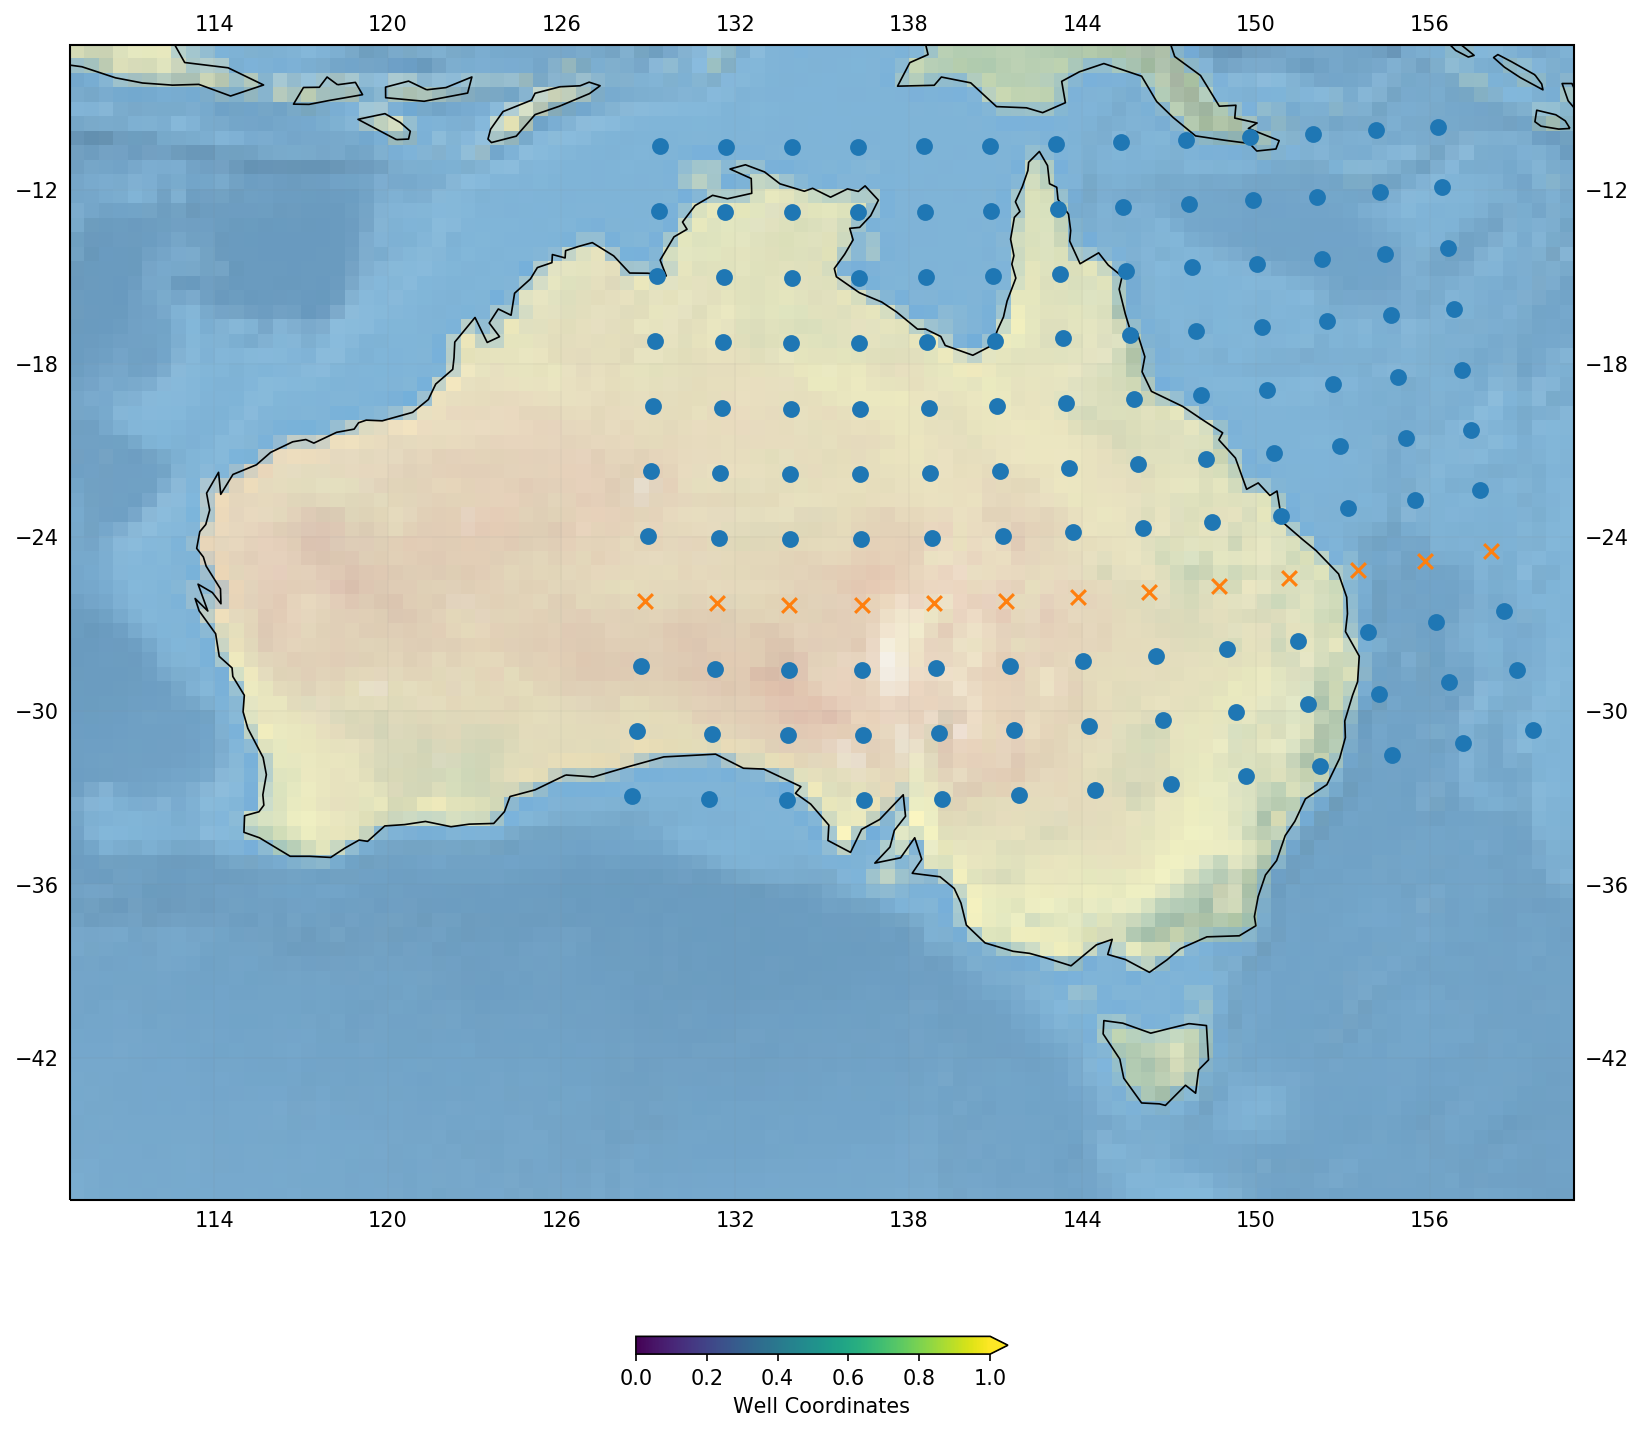

In [5]:
# Coordinates [x,y] of two points on the cross-section
cs=np.zeros((2,2))
cs[0,:] = [wd['D10']['POINT_X'],wd['D10']['POINT_Y']]  # point 1
cs[1,:] = [wd['D1']['POINT_X'],wd['D1']['POINT_Y']]  # point 2

# Interpolation parameters
nbpts = 500  
gfilt = 2  

# Show the location of the cross-section on the topography map
strat.plotSectionMap(title='Topography map', xlegend='Distance (m)', ylegend='Distance (m)',
                     color=cmo.cm.delta, colorcs='magenta', crange=[-2000,2000], cs=cs, size=(6,6))

In [6]:
# Build cross-section
strat.buildSection(xo = cs[0,0], yo = cs[0,1], xm = cs[1,0], ym = cs[1,1], pts = nbpts, gfilter = gfilt)
strata.viewSection(width = 800, height = 500, cs = strat, 
            dnlay = 2, rangeX=[2000, 10000], rangeY=[-300,200],
            linesize = 0.5, title='Stratal stacking pattern coloured by time')

## 1.4- Visualize stratal stacking pattern coloured by facies

First we build paleo-depositional environment (facies) structure based on the paleo-water depth. For example ([reference](https://opentextbc.ca/geology/chapter/6-3-depositional-environments-and-sedimentary-basins/)),

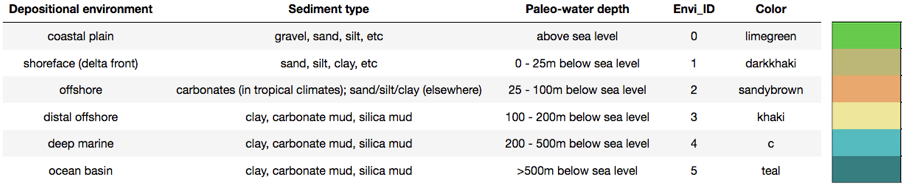

In [7]:
# Specify the range of water depth for the depositional environments, see the table above
depthID = [0, -25, -100, -200, -500]

# Define colors for depositional environments, with number of colors equals to len(depthID) + 2
colorDepoenvi = ['white','limegreen','darkkhaki','sandybrown','khaki','c','teal'] 
# 'White' colors where either no deposition or deposited sediemnt thickness < 0.01 m.

# Build an array of depositional environment ID (enviID)
enviID = np.zeros((strat.nz, len(strat.dist)))
enviID = strata.buildEnviID(cs = strat, depthID = depthID)

# print(enviID.shape)
# Plot stratal stacking pattern colored by paleo-depositional environments
# It can take up to 5 mins...
# Need to be careful with dnlay in the following line.
# strata.viewDepoenvi(width = 8, height = 5, cs = strat, enviID = enviID, dnlay = 2, color = colorDepoenvi, 
#                     rangeX=[2000, 12000], rangeY=[-500,100], savefig = 'Yes', figname = 'delta_strata_depoenvi')

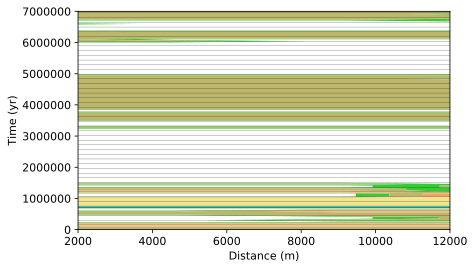

In [8]:
# Time structure of the model, corresponding to the Time structure in the input.xml file
start_time = 0.  # the start time of the model run [a]
disptime = 50000.  # the layer interval of the strata module [a]
end_time = start_time + disptime * timestep  # the time of the loaded output [a]
layertime = np.linspace(start_time,end_time,strat.nz)  # time of the layers

# Plot Wheeler diagram
strata.viewWheeler(width = 7, height = 4, cs = strat, enviID = enviID, time = layertime, dnlay = 3, color = colorDepoenvi, 
                   rangeX=[2000, 12000], rangeY = None, savefig = 'Yes', figname = 'delta_Wheeler_diagram')

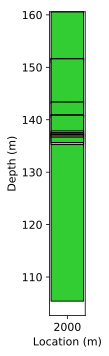

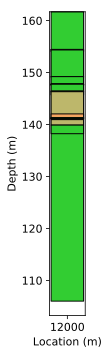

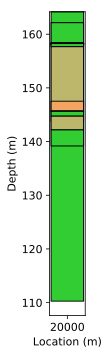

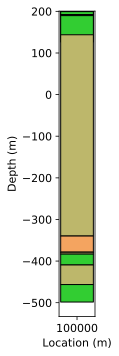

In [9]:
# Location of the core on the cross-section (m)
posit = [2000, 12000, 20000, 100000]

# Plot the core
for posit in posit:
    strata.viewCore(width = 2, height = 5, cs = strat, enviID = enviID, posit = posit, time = layertime, 
                color = colorDepoenvi, rangeX = None, rangeY = None, savefig = 'Yes', figname = 'delta_core')

### Sea level

In [10]:
# Folder path of the sea level file
SLfolder = 'AUSP1307/Sea_level/Haq_87_Muller2018_M6.csv'  
SLtime, sealevel = strata.readSea(SLfolder)
 
# View sea level curve
strata.viewData(x0 = SLtime, y0 = sealevel, width = 800, height = 500, linesize = 3, 
                color = '#6666FF',title='Sea level curve',xlegend='Time [yr]',ylegend='Sea level position [m]')